<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/KnapsackProblem_informe10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **El problema de la mochila**


Dados los pesos y valores de n artículos, se colocan en una mochila de capacidad $w$ de manera que estos de el valor maximo. La pregunta entonces se resume en ¿Qué artículos se deben guardar en la mochila para maximizar el valor total de ellos?

![image](https://cdn.discordapp.com/attachments/838249461268217916/1033523092745617459/WhatsApp_Image_2022-10-21_at_2.31.11_PM.jpeg)

---

**Entrada:**

* Un arreglo que indica los valores de $n$ datos $valores=\left[v_1,v_2,...,v_n\right]$.
* Un arrego que indica los pesos de cada objeto de $n$ datos $weight=\left[w_1,w_2,...,w_n\right]$.

> Se asume que un objeto $i$ en el arreglo de valores tiene su peso en la casilla $i$ del arreglo que indica los pesos de los objetos

* A su vez ingresa la capacidad máxima de la mochila.

**Salida:**

* Un número real que indica el valor máximo en objetos que soporta la mochila.



# 1.2. **Solución al problema: knapsack Algorithm Buttom Up**



> **Paradigma**: Programación dinámica.

La tarea de este algoritmo consiste en en encontrar el máximo valor en objetos que una mochila con **capacidad de almacenamiento limitado** puede guardar sin romperse o desbordarse. Por ello cada objeto tiene asociado un peso y un precio.

En una mochila de capacidad máxima de $20kg$ un ladrón busca robar los siguientes objetos:

* **Guitarra:** *13Kg / 30*$

* **Pesa de ejercicio:** *7 kg / 10*$

* **Cadena de oro:** *2 kg / 200*$

* **Reloj de plástico:** *1 kg / 2*$


Para comunicarselo al computador el ladrón coloca ingresa los siguientes arreglos al algoritmo. 

* Peso = $[13, 3, 2, 1]$

* Valores = $[30, 10, 200, 2]$

El algoritmo devolverá un entero que corresponde a la máxima suma de artículos que pueden guardarse en la mochila sin romperla. En este caso ese valor corresponde a $212$ ya que en cuanto a peso, la cadena es la más eficiente dado a que es liviana y es muy valiosa en cambio, en proporción, la guitarra sería la menos eficiente de llevar siempre, quedando la suma final $200 + 10 + 2 = 212$. Para lograr esta tarea el algoritmo prueba cada combinación posible.









# 1.3. **Solución al problema: knapsack Algorithm Greedy**

> **Paradigma**: Greedy.

Este algoritmo realiza una tarea similar al de su contraparte Dinámica, pero en cambio. Para intentar reducir el costo de las operaciones, asume varios factores que facilitan la ejecucución `(Tal como que entre más objetos se lleven, mayor será el valor)`. Por lo que en los casos en que sus asumciones no son correctas tiende a entregar resoluciones equivocadas al problema.

> Esto debido a que la aproximación **greedy** es ingenua y optimista.


#2. **Código**

## **Generador de instancias**

In [141]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

In [18]:
from termcolor import colored # Colores

## **Bottom up**

> **Paradigma**: Porgramación dinámica Bottom Up

In [180]:
import numpy as np

subp = 0

def max(a,b):
  if a > b: return a
  return b

## bottom-up
def knapsack_BottomUp(W, wt, val, verbose=False):
    if verbose:
      print(colored("---------------------------------------------------------------------------------------------","green"))
      print(f"La mochila soporta hasta un peso de {W}[kg].\n")
    
    n = len(val) #Largo de ambos arreglos

    K = np.zeros((n+1, W+1), dtype=int)
    
    for i in range(n + 1):
         for w in range(W + 1):
             if i == 0  or  w == 0:
                  K[i][w] = 0
             elif wt[i-1] <= w:
                  prev = K[i-1][w]
                  current =  val[i-1] + K[i-1][w-wt[i-1]]
                  K[i][w] = max(current, prev)
                  if verbose:
                      print(colored("\n------------------------------------------\n","green"))
                      print(colored("La mochila soporta hasta","blue"),w,colored("[kg]","green"), colored("contiene hasta","blue"),i-1, colored("y su valor máximo es","blue"),K[i-1][w],colored("$","green"),"\n")
                      print(f"Es posible agregarle el artículo {i} cuyo peso es {wt[i-1]}[kg] y vale ${val[i-1]}.")
                      print(f"   Se compara el valor de la mochila con el valor que tendria si se le agrega el artículo {i} al "+
                            f"máximo valor de la mochila con peso {w-wt[i-1]}[kg]:")
                      print(f"       ${val[i-1] + K[i-1][w-wt[i-1]]} = ${val[i-1]} + ${K[i-1][w-wt[i-1]]}.")
                      print(colored("El valor máximo para la mochila que soporta","blue"), i, colored("artículos y","blue"),  w, colored("[kg]","green"), colored("es de","green"),K[i][w],colored("$","green"))
             else:
                  K[i][w] = K[i-1][w]
                  if verbose:
                      print(colored("------------------------------------------","green"))
                      print(f"La mochila soporta {w}[kg], contiene hasta {i-1} y tiene ${K[i-1][w]}.")
                      print(f"No se puede agregar el artículo de ${val[i-1]} y {wt[i-1]}[kg].")
                      print(f"Entonces el valor para la mochila que contiene hasta {i} artículos y soporta {w} se mantendra igual a lo que valia antes:\n"+
                            f"        ${K[i-1][w]}")
    
    if verbose:
        print(colored("\n------------------------------------------\n","green"))
        print(f"Entonces el precio máximo que se puede obtener en la mochila sera ${K[n][W]}.")
        print(colored("---------------------------------------------------------------------------------------------","green"))

    global subp
    subp = (n) ## Porque el ultimo donde i=n seria el problema real.
    subp *= (W+1)
    return K[n][W]

value = [30, 10, 200, 2] # $
weight =  [20, 3, 2, 1] # kg
capacity = 20

 
print(colored("* Valores:    ","blue"),value,colored(" $","green"))
print(colored("* Pesos:         ","blue"),weight,colored("Kg","green"))
print(colored("* Capacicad:                ","blue"),capacity, colored("Kg","green"))
print(colored("\n---Fin ejecución---\n", "red"))
#---
ans = knapsack_BottomUp(capacity,weight,value)
print(colored('* El máximo valor que puede ser cargado es: ',"yellow"), ans, colored("$","green"))
print(colored("Se realizan","yellow"),subp,colored("Subproblemas","yellow"))

* Valores:     [30, 10, 200, 2]  $
* Pesos:          [20, 3, 2, 1] Kg
* Capacicad:                 20 Kg

---Fin ejecución---

* El máximo valor que puede ser cargado es:  212 $
Se realizan 84 Subproblemas


## **Voraz**

> **Paradigma**: Greedy

In [169]:
iteraciones = 0

## Greddy
def Knapsack_Greedy(W, wt, val, verbose=False):
    if verbose: print(f"La mochila soporta hasta un peso de {W}[kg].")
    
    n = len(val) #Largo de ambos arreglos

    max = val[0]
    w = wt[0] # weight
    
    if verbose:
        print(colored("---------------------------------------------------------------------------------------------","green"))
        print(f"Se le agrega el articulo 1 de peso {w}[kg].")
        print(f"La mochila ahora tiene un peso de {w}[kg] y un valor de ${max}.")
    
    global iteraciones

    for i in range(1,n):
        iteraciones += 1
        if verbose: 
            print(colored("\n------------------------------------------\n","green"))
            print(f"El artículo {i+1} tiene un peso {wt[i]}[kg].\n"+
                  f"La mochila contiene un peso de {w}[kg] y un valor de ${max}.\n"+
                  f"Si lo agregaramos a la mochila, tendriamos {w + wt[i]}[kg] de peso en articulos en total.")
        if w + wt[i] > W: 
            if verbose:
                print(f"No podemos agregar el artículo {i+1} con peso {wt[i]}[kg].\n"+
                      f"Porque se tendria un peso {w + wt[i]}[kg] que es mayor al peso {W}[kg] permitido por la mochila.\n"+
                      f"Como estan ordenado por pesos, tampoco se puede agregar a los siguientes articulos.")
            break
        max += val[i]
        w += wt[i]
        if verbose:
            print(f"El artículo se puede agregar a la mochila sin sobrepasar el peso máximo {W}[kg]. \n"+
                  f"Entonces agregamos el artículo.\n"+
                  f"El nuevo peso en la mochila con todos sus artículo es de {w}[kg] y su valor es de ${max}.")
    if verbose:
        print(colored("\n------------------------------------------\n","green"))
        print(f"Entonces el precio máximo que se puede obtener en la mochila sera ${max}.")
        print(colored("---------------------------------------------------------------------------------------------","green"))
    return max

v = [30, 10, 200, 2] # $
w =  [20, 7, 2, 1] # kg
W = 20

print(colored("* Valores:    ","blue"),value,colored(" $","green"))
print(colored("* Pesos:         ","blue"),weight,colored("Kg","green"))
print(colored("* Capacicad:                ","blue"),capacity, colored("Kg","green"))
print(colored("\n---Fin ejecución---\n", "red"))
#---

Max = Knapsack_Greedy(W, w, v)
print(colored('* El máximo valor que puede ser cargado es: ',"yellow"), Max, colored("$","green"))
print(colored("Se realizan","yellow"),iteraciones,colored("iteraciones","yellow"))

* Valores:     [30, 10, 200, 2]  $
* Pesos:          [20, 3, 2, 1] Kg
* Capacicad:                 20 Kg

---Fin ejecución---

* El máximo valor que puede ser cargado es:  30 $
Se realizan 1 iteraciones


# 2.2. **Ejecución del algoritmo paso a paso**

In [181]:
print(colored("* Valores:    ","blue"),val,colored(" $","green"))
print(colored("* Pesos:         ","blue"),wt,colored("Kg","green"))
print(colored("* Capacicad:                ","blue"),W, colored("Kg","green"))
print(colored("\n---Fin ejecución---\n", "red"))
#---

subp = 0
ans = knapsack_BottomUp(W, wt, val,True)

print(colored('* El máximo valor que puede ser cargado es: ',"yellow"), ans, colored("$","green"))
print(colored("Se realizan","yellow"),subp,colored("iteraciones","yellow"))


* Valores:     [96, 139, 151, 215, 225, 236, 305, 394, 479, 537]  $
* Pesos:          [1, 7, 5, 7, 13, 16, 9, 16, 24, 33] Kg
* Capacicad:                 20 Kg

---Fin ejecución---

---------------------------------------------------------------------------------------------
La mochila soporta hasta un peso de 20[kg].


------------------------------------------

La mochila soporta hasta 1 [kg] contiene hasta 0 y su valor máximo es 0 $ 

Es posible agregarle el artículo 1 cuyo peso es 1[kg] y vale $96.
   Se compara el valor de la mochila con el valor que tendria si se le agrega el artículo 1 al máximo valor de la mochila con peso 0[kg]:
       $96 = $96 + $0.
El valor máximo para la mochila que soporta 1 artículos y 1 [kg] es de 96 $

------------------------------------------

La mochila soporta hasta 2 [kg] contiene hasta 0 y su valor máximo es 0 $ 

Es posible agregarle el artículo 1 cuyo peso es 1[kg] y vale $96.
   Se compara el valor de la mochila con el valor que tendria si se 

In [170]:
print(colored("* Valores:    ","blue"),val,colored(" $","green"))
print(colored("* Pesos:         ","blue"),wt,colored("Kg","green"))
print(colored("* Capacicad:                ","blue"),W, colored("Kg","green"))
print(colored("\n---Fin ejecución---\n", "red"))
#---

iteraciones = 0
ans = Knapsack_Greedy(W, wt, val,True)
print(colored('* El máximo valor que puede ser cargado es: ',"yellow"), ans, colored("$","green"))
print(colored("Se realizan","yellow"),iteraciones,colored("iteraciones","yellow"))

* Valores:     [96, 139, 151, 215, 225, 236, 305, 394, 479, 537]  $
* Pesos:          [1, 7, 5, 7, 13, 16, 9, 16, 24, 33] Kg
* Capacicad:                 20 Kg

---Fin ejecución---

La mochila soporta hasta un peso de 20[kg].
---------------------------------------------------------------------------------------------
Se le agrega el articulo 1 de peso 1[kg].
La mochila ahora tiene un peso de 1[kg] y un valor de $96.

------------------------------------------

El artículo 2 tiene un peso 7[kg].
La mochila contiene un peso de 1[kg] y un valor de $96.
Si lo agregaramos a la mochila, tendriamos 8[kg] de peso en articulos en total.
El artículo se puede agregar a la mochila sin sobrepasar el peso máximo 20[kg]. 
Entonces agregamos el artículo.
El nuevo peso en la mochila con todos sus artículo es de 8[kg] y su valor es de $235.

------------------------------------------

El artículo 3 tiene un peso 5[kg].
La mochila contiene un peso de 8[kg] y un valor de $235.
Si lo agregaramos a la moch

# 3. **Tiempo de ejecución**

Este tiempo de ejecución es en base a que el algoritmo retorna el retorno máximo, no tiene en cuenta la obtención de los artículos que se encuentra en la mochila del retorno máximo.



##**Bottom-up**

###Teorema (Complejidad Temporal).

*El algoritmo `Knapsack Problem` implementado a traves de **Bottom-up** tiene un **tiempo de ejecución** de $O(n*W)$.*

####***Prueba del teorema.***

#####Lógica

Para la resolución de este problema tenemos 2 bucles anidados, usados para recorrer los subproblemas a resolver antes de ser capaz de resolver el problema real (refiriéndose al aquellos problemas con menor tamaño al pedido).

Cada problema tiene en cuenta que tenemos el valor óptimo de sus subproblemas (el problema para cualquier mochila que soporta menos peso o artículos). Y con ese dato, dentro del bucle chico se resuelve el problema a todos los pesos posibles sacando el valor otpimo de cada uno al agregar el artículo $i$, dentro de este bucle se tiene un tiempo de ejecución $W \rightarrow O(W)$. 

Para el valor óptimo del tamaño pedido se deben resolver los subproblemas al agregar cada articulo $i=0$ **to** $n-1$. Provocando que se resuelvan los $W$ subproblemas al agregar cada artículo calculando su valor optimo con cada peso posible un total de $n$ veces, es decir, resolver $(n-1)*W$ subproblemas antes de resolver el problema real al agregar el ultimo articulo.

El problema real también tiene un tiempo de ejecución $W \rightarrow O(W)$.

Entonces se trata de resolver $n$ veces un problema con tiempo de ejecución $O(W)$. Por eso el algoritmo **bottom-up** para resolver `KnapSack Problem` es de $n * W → O(n*W)$.


##**Greedy**


###Teorema (Complejidad Temporal).

*El algoritmo `Knapsack Problem` implementado a traves de **Greedy** tiene un **tiempo de ejecución** de $O(n)$.*

####*Prueba del teorema.*

#####Lógica

Para la resolución de este problema tenemos 1 bucle, usado para recorrer los articulos.

En este método se aplica a una unica mochila, entonces se recorre cada artículo una vez antes de decidir agregarlo si no se sobrepasa el peso soportable por la mochila al realizar dicha accion. Como son $n$ articulos a recorrer, el bucle tiene una complejidad temporal $O(n)$.

Dentro y fuera del bucle hay unicamente operaciones con complejidad $O(1)$.

Por ende la complejidad del método es la complejidad del bucle, es decir, el método **Greedy** para este problema tiene complejidad $O(n)$

# 4. **Correctitud**

## **bottom-up Approach**

### **Teorema (Correctitud).**

El algoritmo entrega el máximo retorno posible de una *mochila* con peso $W$ teniendo $n$ artículos con diversos pesos y valores.


### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Knap Sack Problem`:

> Al comienzo de cada iteración $i$ del bucle más grande, tendremos el máximo retorno de la *mochila* al agregar el artículo $i=i-1...0$ a cada mochila posible con $w \leq W$ calculado y guardado.

$w$ es cada peso.
$i$ seria al agregar el artículo y a cada $w$.


#### **Inicialización**


Al comienzo de la primera iteración $i=1$, tendremos los valores para cada $w$ al intentar ingresar el artículo anterior $i-1=0$. Como el artículo 0 no existe, tiene peso y valor $0$ lo cual es correcto. pues independientemente de los precios aplicados, agregar un articulo que vale $\$0$ a una mochila que contiene un valor de $\$0$ no cambiara su valor, independientemente del peso que soporte la **mochila**.


#### **Mantención**


Aplicando inducción, asumimos que, al comienzo de cada iteración, se cumple la propiedad. Es decir, en la iteración donde probamos agregar el artículo $i$ obteniendo un valor óptimo tenemos el valor óptimo para cada peso al agregar cada artículo $i=i-1...0$ calculado.

Consideremos que $i=x$ como el tamaño del problema con $x < n$.

Dentro del bucle más pequeño ($w=0$ to $W+1$), se ira obteniendo el valor máximo para una **mochila** que soporta un peso de $w$ al agregar el artículo $x$, si su peso individual no supera peso máximo que dicha **mochila** permite.

Si el peso individual del elemento sobrepasa el peso soportado de la **mochila**, entonces dejamos como valor óptimo el valor al agregar el artículo $x-1$ a una **mochila** con el mismo peso $w$.

Si el elemento $x$ no posee un peso superior a $w$ que soporta la **mochila**, entonces se comparará:
* El valor máximo de la **mochila** con el mismo peso $w$ cuando se agregó el artículo $x-1$.
* El precio del artículo $x$  $|$ $+$ $|$ El valor óptimo de una mochila que al agregar el peso del artículo $x$ contenga un peso de $w$.

Y aquel que sea mayor se insertara como el valor óptimo para la *mochila* de la iteración $w$ del bucle más pequeño al intentar agregar el artículo $x$ por el bucle más grande.

Con todos los resultados del bucle más pequeño, se calcula el valor para la *mochila* de peso $w=W$ soportable en la iteración $x$. Y ese sería el valor óptimo del problema si $x=n$.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

## **Greedy Approach**


#### **¿Por qué no es correcto?**

El método **greedy** cumple su propósito, al usar un enfoque ingenuo y optimista nos permite encontrar una solución con una complejidad temporal y espacial mucho menor a otras soluciones.

Pero, pese a que llega a un resultado, no siempre encuentra el correcto al problema, esto se puede ver si usamos distintos casos, a cada uno el mismo caso, provocando que den distintos resultados.

Esto se debe a la naturaleza del problema y a la ingenuidad y optimismo del **greedy**. El problema requiere un valor optimo entre todas las posibles combinaciones de artículos (en solitario, un conjunto de pocos o muchos). mientras que **greedy** cree ingenuamente que mientras más artículos se acomodan mayor será el posible precio, optimistamente asume que ese valor total será la solución y dicha solución tendrá al elemento con menor peso.

Podemos usar un ejemplo simple para demostrar esto:
* $W = 185 \Leftarrow$ Peso soportable.
* $A = [01,02,03,04] \Leftarrow$ Número correspondiente al artículo.
* $w = [20,60,100,170] \Leftarrow$ Pesos de cada artículo.
* $v = [15,60,75, 200] \Leftarrow$ valor de cada artículo.

Para agregar la mayor cantidad de artículos a la mochila, hay que ir comprobando si podemos ir agregando el articulo desde el que tiene menor peso hasta el que tiene mayor peso.

Entonces con **greedy** se irán agregando desde el articulo con menor peso, hasta que no se pueda agregar el siguiente, entonces a la mochila se le agregarán los artículos $01,02,03$ sumando un total de $180[kg]$ y $\$159$.

Pero para esta situación podemos obtener un valor mayor si simplemente ponemos únicamente el articulo $04$ en la mochila, dejando la mochila con $170[kg]$ y $\$200$, que sería el valor máximo con el que se puede llenar la mochila.

El **greedy** es ingenuo al asumir que ciertas situaciones nunca ocurrirán, pero para este problema es posible que cualquier combinación de artículos en cualquier cantidad sea la respuesta. Por eso no es correcto.

# 5. **Experiementos**

A continuación se realizarán experimentos los cuales incluyen investigar:

* Los tiempos de ambos algoritmos en función del tamaño de entrada y compararlos.
* La cantidad de iteraciones/subproblemas que realizan los algoritmos en función del tamaño de entrada y compararlos.
* El valor de los items alcanzado por ambos algoritmos (puede hacer boxplots para distintos tamaños de problemas, por ejemplo 5, 10, 20 y 50).



---
---

## 5.1 **Los tiempos de ambos algoritmos en función del tamaño de entrada y compararlos.** (Tiempos de ejecución)

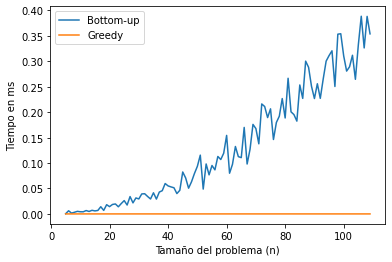

In [85]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,110):
    
    #---- SE LLAMA AL GENERADOR DE INSTANCIAS --
    W, val, wt = knapsack_instance_generator(n)
    #------------------------------------------
    iteraciones = 0
    subproblemas = 0

    #la función repeat está ejecutando 10 veces KnapsackBottomUp y KnapsackGreedy con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import knapsack_BottomUp", stmt=f"knapsack_BottomUp({W}, {w}, {v})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import Knapsack_Greedy", stmt=f"Knapsack_Greedy({W}, {w}, {v})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

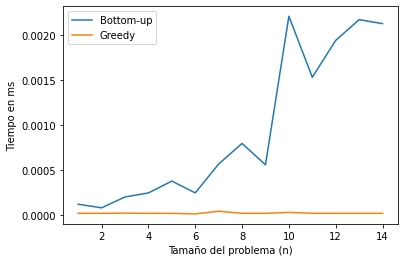

In [103]:
## Menor n para comparar los resultados
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,15):
    #---- SE LLAMA AL GENERADOR DE INSTANCIAS --
    W, val, wt = knapsack_instance_generator(n)
    #------------------------------------------
    iteraciones = 0
    subproblemas = 0

    #la función repeat está ejecutando 10 veces KnapsackBottomUp y KnapsackGreedy con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import knapsack_BottomUp", stmt=f"knapsack_BottomUp({W}, {w}, {v})", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import Knapsack_Greedy", stmt=f"Knapsack_Greedy({W}, {w}, {v})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Bottom-up", "Greedy"])

plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

## **Análisis de resultados**

Es evidente una clara diferencia entre los tiempos de ejecución de ambos algoritmos. Mostrándose el algoritmo Greedy especialmente dominante en este campo, siendo ampliamanete superior a su contraparte en la totalidad de los casos.

Esta amplia diferencia surge a raíz del funcionamiento propio de cada algoritmo, en el caso de *Buttom-up* este comprueba todas las combinaciones posibles entre artículos, repasando así todos los casos posibles para entregar la solución óptima al problema, esto genera a su vez una gran cantidad de subproblemas a resolver, aún así, tiende a ser muy preciso y entregar el resultado correcto del problema. 

> Dicha precisión tiene un alto costo en los tiempos de ejecucón que se ve reflejado en las gráficas.

Por su parte la solución utilizando *Greedy* entrega una resolución más rápida,  pero imprecisa. Esta imprecisión es causa de que el algoritmo asume y da por sentado una gran variedad de factores, por lo que no funciona en la totalidad de los casos y tiende a dar respuestas incorrectas al problema.

> El bajo costo de su imprecisión también se ve reflejado en la gráfica.

---
---

## 5.2 **La cantidad de iteraciones/subproblemas que realizan los algoritmos en función del tamaño de entrada y compararlos.** (Iteraciones)

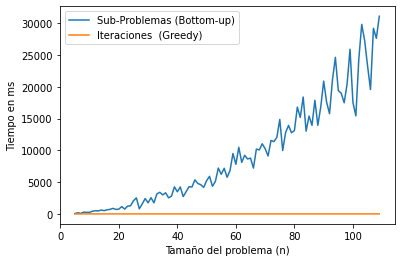

In [107]:
import matplotlib.pyplot as plt

x=[]; y=[]; y1=[]

for n in range(5,110):
  
    #---- SE LLAMA AL GENERADOR DE INSTANCIAS --
    W, val, wt = knapsack_instance_generator(n)
    #------------------------------------------

    iteraciones = 0
    subproblemas = 0
    #----------------------
    valor = knapsack_BottomUp(W, w, v)
    valor = Knapsack_Greedy(W, w, v)
    #----------------------
    x.append(n)
    y.append(subproblemas)
    y1.append(iteraciones)
    #----------------------

#----------------------
plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Sub-Problemas (Bottom-up)", "Iteraciones  (Greedy)"])
#----------------------
plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

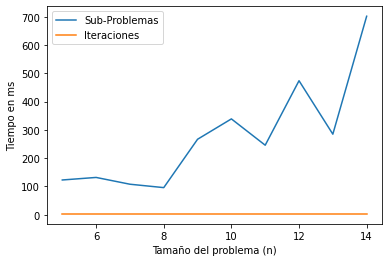

In [108]:
## Menor n para comparar los resultados
import matplotlib.pyplot as plt

x=[]; y=[]; y1=[]

for n in range(5,15):

    #---- SE LLAMA AL GENERADOR DE INSTANCIAS --
    W, val, wt = knapsack_instance_generator(n)
    #------------------------------------------

    iteraciones = 0
    subproblemas = 0
    #----------------------
    valor = knapsack_BottomUp(W, w, v)
    valor = Knapsack_Greedy(W, w, v)
    #----------------------
    x.append(n)
    y.append(subproblemas)
    y1.append(iteraciones)
    #----------------------

#----------------------
plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Sub-Problemas", "Iteraciones"])
#----------------------
plt.xlabel('Tamaño del problema (n)')
plt.ylabel('Tiempo en ms')
plt.show()

## **Análisis de resultados**

Corroborando la anterior investigación hecha, es evidente que entre los subproblemas generados por la aproximación Bottom-Up y los subproblemas generados por la aproximación Greedy hay una gran diferencia en números, llegando esta última a ser varios miles de veces inferior en número de iteraciones a su contraparte con sus subproblemas.

Esta gran diferencia puede deberse a diversos factores tales como:

> Se establece "$n$" como largo del arreglo.

* **Greedy**: Solo recorre una vez cada uno de los $n$ artículos totales. Comportamiento asociado a su a su naturaleza lineal, ya que posee tiempo de ejecución $O(n)$.

* **Bottom-Up**: Su naturaleza mixta $ O(n*W)$ tiende a crear matrices que involucran ambas variables $n+1$ * $w+1$. Lo que causa un aumento desproporcionado en sus subproblemas si ocurre un aumento en $n$


---
---

## 5.3 **El valor de los items alcanzado por ambos algoritmos (puede hacer boxplots para distintos tamaños de problemas, por ejemplo 5, 10, 20 y 50).**




In [111]:
from plotnine import *

In [130]:
import pandas as pd
import numpy as np


def createDataFrame(n):
    x=[]; V=[]; tipo = []
    for i in range(10):
        
        #---- SE LLAMA AL GENERADOR DE INSTANCIAS --
        W, val, wt = knapsack_instance_generator(n)
        #------------------------------------------
        iteraciones = 0
        subproblemas = 0

        valorB = knapsack_BottomUp(W, wt, val)
        valorG = Knapsack_Greedy(W, wt, val)

        x.append(str(W) + "[kg]")
        V.append(valorB)
        tipo.append("Bottom-up")
        x.append(str(W) + "[kg]")
        V.append(valorG)
        tipo.append("Greedy")
    #----------------------------------------
    datos = {'Peso que soporta la mochila': x,
             'Tipo': tipo,
             'Valor': V}
    return pd.DataFrame(datos)

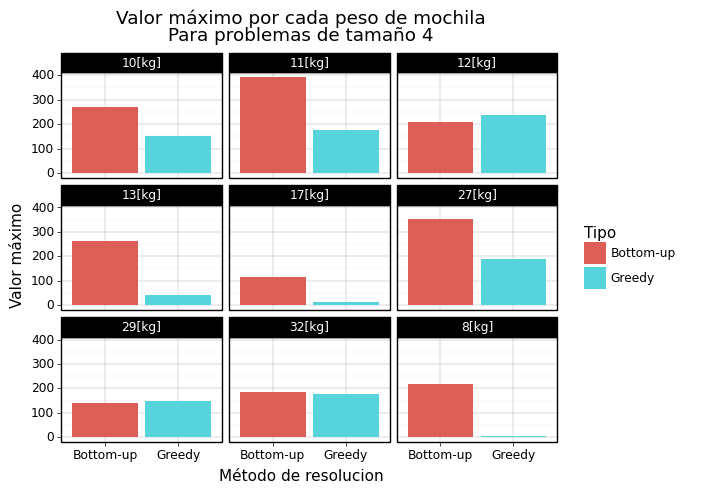

<ggplot: (8766811912145)>

In [121]:
# Comparacion tamaño 4
(ggplot(createDataFrame(4))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolucion",
     y="Valor máximo",
     title="Valor máximo por cada peso de mochila\nPara problemas de tamaño 4",
    )
)

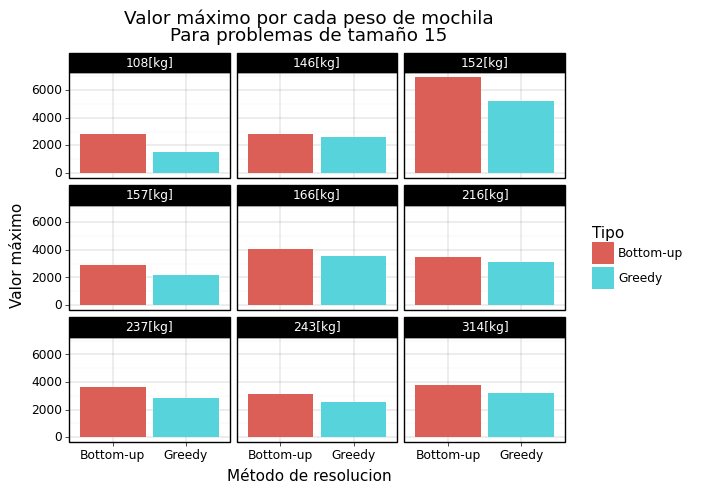

<ggplot: (8766812729353)>

In [122]:
# Comparacion tamaño 15
(ggplot(createDataFrame(15))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolucion",
     y="Valor máximo",
     title="Valor máximo por cada peso de mochila\nPara problemas de tamaño 15",
    )
)

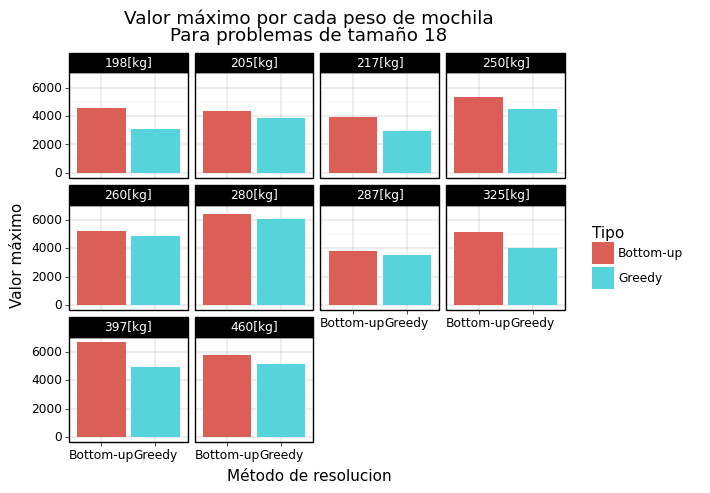

<ggplot: (8766812445897)>

In [123]:
# Comparacion tamaño 18
(ggplot(createDataFrame(18))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolucion",
     y="Valor máximo",
     title="Valor máximo por cada peso de mochila\nPara problemas de tamaño 18",
    )
)

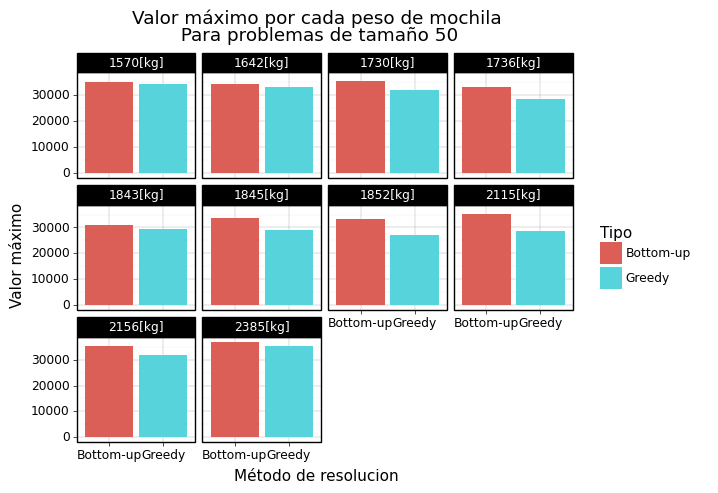

<ggplot: (8766812034845)>

In [131]:
# Comparacion tamaño 50
(ggplot(createDataFrame(50))+
 aes(x='Tipo' , y='Valor', fill='Tipo')+
 geom_bar(stat="identity")+
 facet_wrap(['Peso que soporta la mochila'])+
 theme_linedraw()+
 labs(
     x="Método de resolucion",
     y="Valor máximo",
     title="Valor máximo por cada peso de mochila\n Para problemas de tamaño 50",
    )
)

## **Análisis de resultados**

Práticamente en la totalidad de los casos, el valor máximo obtenido por **Buttom-up** fue superior al de su contraparte **Greedy**.

Esto es a su vez, una clara muestra de la imprecisión que demuestra el algoritmo que utiliza la aproximación **Greedy**, pues, como se vio en la sección de correctitud el algoritmo que utiliza **Bottom-up** es correcto, por lo que a su vez es válido afirmar que si la aproximación **Greedy** tuviera un valor igual al de su contraparte, entonces esta también entregaría el resultado correcto, pero no es el caso. 

> **Este experimento es demostración gráfica de como un algoritmo más rápido, no siempre es el más óptimo al resolver un mismo problema.**